# Account segmentation using K means clustering

### Problem Statement:
##### There are 200 Named customers who have adopted new product "E". Identify new target set of accounts who can be more likely to buy the launched new product "E" by analysing the existing customer behaviour and define the respective campaign plan for each segments.
##### Dataset Attributes:
1.Account Id - Is a unique identifier for each accounts
2.Account Name - Name of the account
3.Type - defines whether account is "Named" or "Non Named"
4.Product - Different products that customer purchased
5.Event Visit - Total counts of visits made by customer at each event
6.Revenue - Total revenue for each customer
7.website Visits - website visits made by each customer
8.Community User - Indicates whther particuar customer is part of product community or not
9.White Paper Downloads - count of Whitepaper downloads pertaining to the product "E"

##### Note: This is dummy data created based on my knowledge and experience.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
data_df = pd.read_csv("C:\\Users\\antot\\OneDrive\\Desktop\\Personal\\RH\\K_Means_Data.csv")

In [220]:
data_df.head()

,Account Id,Account Name,Type,Product,Event Visit,Revenue,website Visits,Community User,White Paper Downloads
0,10001,ibm,Named,A,16,280750,14,Yes,Yes
1,10002,tata consultancy services,Named,B,2,2454500,5,Yes,Yes
2,10003,accenture,Named,C,2,2456000,2,Yes,Yes
3,10004,us army,Named,D,8,774250,9,Yes,Yes
4,10005,ey,Named,A,17,204250,17,Yes,Yes


## EDA

### Check for duplicates

In [221]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data_df.shape)

Number of duplicate rows = 0
(422, 9)


In [222]:
data_df.dtypes

Account Id                int64
Account Name             object
Type                     object
Product                  object
Event Visit               int64
Revenue                   int64
website Visits            int64
Community User           object
White Paper Downloads    object
dtype: object

#### Descriptive Statistics for Numerical & Categorical columns

In [224]:
cat=[]
num=[]
for i in data_df.columns:
    if data_df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Account Name', 'Type', 'Product', 'Community User', 'White Paper Downloads']
['Account Id', 'Event Visit', 'Revenue', 'website Visits']


In [225]:
data_df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Account Id,422.0,1.021887e+04,125.965156,10001.0,10110.5,10220.5,10328.75,10434.0
Event Visit,422.0,8.106635e+00,4.867899,1.0,4.0,8.0,11.00,19.0
Revenue,422.0,1.266203e+06,697163.059395,137250.0,780062.5,1140750.0,1912812.50,2500000.0
website Visits,422.0,8.997630e+00,5.518055,0.0,4.0,8.0,13.00,20.0


In [226]:
data_df[cat].describe().T

,count,unique,top,freq
Account Name,422,422,linkedin,1
Type,422,2,Non Named,222
Product,422,4,D,111
Community User,422,2,Yes,238
White Paper Downloads,422,2,Yes,294


### one hot encoding 

In [227]:
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
data_df = pd.get_dummies(data_df, columns = ['Product','Community User','White Paper Downloads'])

In [228]:
data_df

,Account Id,Account Name,Type,Event Visit,Revenue,website Visits,Product_A,Product_B,Product_C,Product_D,Community User_No,Community User_Yes,White Paper Downloads_No,White Paper Downloads_Yes
0,10001,ibm,Named,16,280750,14,1,0,0,0,0,1,0,1
1,10002,tata consultancy services,Named,2,2454500,5,0,1,0,0,0,1,0,1
2,10003,accenture,Named,2,2456000,2,0,0,1,0,0,1,0,1
3,10004,us army,Named,8,774250,9,0,0,0,1,0,1,0,1
4,10005,ey,Named,17,204250,17,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,10430,barclays investment bank,Non Named,8,1179000,5,0,1,0,0,1,0,1,0
418,10431,toyota,Non Named,8,1030000,9,0,0,1,0,1,0,1,0
419,10432,sherwin williams,Non Named,7,1150500,6,0,0,0,1,1,0,1,0
420,10433,arcadis,Non Named,8,1033250,6,0,0,1,0,1,0,1,0


In [229]:
# Are there any missing values ?
data_df.isnull().sum()

Account Id                   0
Account Name                 0
Type                         0
Event Visit                  0
Revenue                      0
website Visits               0
Product_A                    0
Product_B                    0
Product_C                    0
Product_D                    0
Community User_No            0
Community User_Yes           0
White Paper Downloads_No     0
White Paper Downloads_Yes    0
dtype: int64

##### There are no Missing values

In [230]:
df = data_df.drop(['Account Name','Account Id','Type'], axis=1)

In [231]:
df.head()

,Event Visit,Revenue,website Visits,Product_A,Product_B,Product_C,Product_D,Community User_No,Community User_Yes,White Paper Downloads_No,White Paper Downloads_Yes
0,16,280750,14,1,0,0,0,0,1,0,1
1,2,2454500,5,0,1,0,0,0,1,0,1
2,2,2456000,2,0,0,1,0,0,1,0,1
3,8,774250,9,0,0,0,1,0,1,0,1
4,17,204250,17,1,0,0,0,0,1,0,1


### K Means Clustering

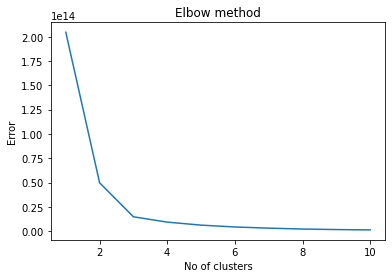

In [232]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df)
    kmeans.fit(df)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

##### Number of optimal clusters is 3

In [233]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_std = scaler.fit_transform(df)
clt = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model = clt.fit_predict(X_std)


C:\Users\antot\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


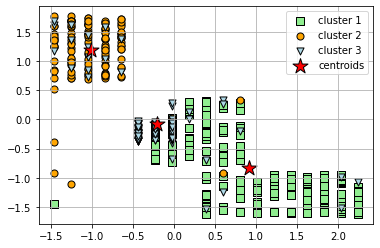

In [234]:
# plot the 3 clusters
plt.scatter(
    X_std[model == 0, 0], X_std[model == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_std[model == 1, 0], X_std[model == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X_std[model == 2, 0], X_std[model == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    clt.cluster_centers_[:, 0], clt.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [235]:
clusterNo= model

In [236]:
data_df['clusterNo']=clusterNo

In [237]:
data_df

,Account Id,Account Name,Type,Event Visit,Revenue,website Visits,Product_A,Product_B,Product_C,Product_D,Community User_No,Community User_Yes,White Paper Downloads_No,White Paper Downloads_Yes,clusterNo
0,10001,ibm,Named,16,280750,14,1,0,0,0,0,1,0,1,0
1,10002,tata consultancy services,Named,2,2454500,5,0,1,0,0,0,1,0,1,1
2,10003,accenture,Named,2,2456000,2,0,0,1,0,0,1,0,1,1
3,10004,us army,Named,8,774250,9,0,0,0,1,0,1,0,1,0
4,10005,ey,Named,17,204250,17,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,10430,barclays investment bank,Non Named,8,1179000,5,0,1,0,0,1,0,1,0,2
418,10431,toyota,Non Named,8,1030000,9,0,0,1,0,1,0,1,0,2
419,10432,sherwin williams,Non Named,7,1150500,6,0,0,0,1,1,0,1,0,2
420,10433,arcadis,Non Named,8,1033250,6,0,0,1,0,1,0,1,0,2


In [238]:
print(clt.cluster_centers_)

[[ 0.90848586 -0.83353867  0.9659414   0.0446486   0.08308015  0.01370503
  -0.13775821 -0.57918027  0.57918027 -0.65982888  0.65982888]
 [-1.00458337  1.18860033 -1.04068083 -0.03467509 -0.10630757 -0.02266932
   0.15967138 -0.38312406  0.38312406 -0.65982888  0.65982888]
 [-0.20350093 -0.07600895 -0.24337789 -0.024468   -0.00439619  0.00432727
   0.02363114  1.13731186 -1.13731186  1.51554446 -1.51554446]]


In [241]:
data_df.to_csv("C:\\Users\\antot\\OneDrive\\Desktop\\Personal\\RH\\Kmeans_op.csv")

In [244]:
result = data_df.groupby(['clusterNo','Type'])['Account Id'].count().unstack().fillna(0)
rowtotal = result.sum()
rowtotal.name = 'rowtotal'
result.append(rowtotal)

Type,Named,Non Named
clusterNo,,
0,119.0,49.0
1,81.0,45.0
2,0.0,128.0
rowtotal,200.0,222.0


### Conclusion

From the above table we can derive the following,

1.Cluster 0 - has 119 Named & 49 Non-named accounts. This explains that 49 non-named accounts which has similar behaviour of major 119 named accounts are more likely be the high priority target accounts
2.Cluster 1 - with 81 Named & 45 Non-Named accounts, these are the medium priority target accounts
3.Cluster 2 - This has low priority as a target account for Product "E"

Campaign Strategy:
Cluster 0 - Create Account based marketing email campaigns, engage executives through 1-1 workshops with each target non-named accounts involving sales & customer success team member, understand their goals, challenges and how they are managing their current challenges.
demo the account how the new product can address their challenges

Cluster 1 - These are switchers who can switch between different competitors. Engaging them effectively is esential as this helps them to recognize and recall the brand value. This can be done through thought leadership campaigns, inviting them to tech talks,seminars and product based events so that they can move in the funnel further.

Cluster 2 - Defining effective nurture flow for this segment is necessary. build nurtureflows and respective actions for these segments. Based on their action score them and push them in to the funnel stages.


